In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#local imports

from split_frames import split_video

In [7]:
src_name = 'tdk-bankrobbery'
!scenedetect -i {src_name}.mp4 -s {src_name}.csv detect-content list-scenes


In [4]:
split_video(filename='tdk-bankrobbery.mp4', path='frames')
path_frames = "./frames/"

Frame Rate = 23.976024651015454
Creating..../frames/frame0.jpg
Creating..../frames/frame23.jpg
Creating..../frames/frame46.jpg
Creating..../frames/frame69.jpg
Creating..../frames/frame92.jpg
Creating..../frames/frame115.jpg
Creating..../frames/frame138.jpg
Creating..../frames/frame161.jpg
Creating..../frames/frame184.jpg
Creating..../frames/frame207.jpg
Creating..../frames/frame230.jpg
Creating..../frames/frame253.jpg
Creating..../frames/frame276.jpg
Creating..../frames/frame299.jpg
Creating..../frames/frame322.jpg
Creating..../frames/frame345.jpg
Creating..../frames/frame368.jpg
Creating..../frames/frame391.jpg
Creating..../frames/frame414.jpg
Creating..../frames/frame437.jpg
Creating..../frames/frame460.jpg
Creating..../frames/frame483.jpg
Creating..../frames/frame506.jpg
Creating..../frames/frame529.jpg
Creating..../frames/frame552.jpg
Creating..../frames/frame575.jpg
Creating..../frames/frame598.jpg
Creating..../frames/frame621.jpg
Creating..../frames/frame644.jpg
Creating..../fram

Creating..../frames/frame5566.jpg
Creating..../frames/frame5589.jpg
Creating..../frames/frame5612.jpg
Creating..../frames/frame5635.jpg
Creating..../frames/frame5658.jpg
Creating..../frames/frame5681.jpg
Creating..../frames/frame5704.jpg
Creating..../frames/frame5727.jpg
Creating..../frames/frame5750.jpg
Creating..../frames/frame5773.jpg
Creating..../frames/frame5796.jpg
Creating..../frames/frame5819.jpg
Creating..../frames/frame5842.jpg
Creating..../frames/frame5865.jpg
Creating..../frames/frame5888.jpg
Creating..../frames/frame5911.jpg
Creating..../frames/frame5934.jpg
Creating..../frames/frame5957.jpg
Creating..../frames/frame5980.jpg
Creating..../frames/frame6003.jpg
Creating..../frames/frame6026.jpg
Creating..../frames/frame6049.jpg
Creating..../frames/frame6072.jpg
Creating..../frames/frame6095.jpg
Creating..../frames/frame6118.jpg
Creating..../frames/frame6141.jpg
Creating..../frames/frame6164.jpg
Creating..../frames/frame6187.jpg
Creating..../frames/frame6210.jpg
Creating..../f

In [9]:
raw_data = pd.read_csv("tdk-bankrobbery-stats.csv", low_memory = False, skiprows = 1)
raw_data.head()


,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
0,1,00:00:00.042,7.875524,6.514187,7.492296,9.620090
1,2,00:00:00.083,6.751998,6.101535,5.829074,8.325385
2,3,00:00:00.125,8.437012,7.547390,7.758870,10.004774
3,4,00:00:00.167,8.767886,8.189345,7.991591,10.122721
4,5,00:00:00.209,7.997215,6.814317,7.709418,9.467909


In [12]:
shotlist_psd = pd.read_csv('tdk-bankrobbery-Scenes.csv', skiprows = 1)
shotlist_psd.head()

,Scene Number,Start Frame,Start Timecode,Start Time (seconds),End Frame,End Timecode,End Time (seconds),Length (frames),Length (timecode),Length (seconds)
0,1,0,00:00:00.000,0.000,256,00:00:10.677,10.677,256,00:00:10.677,10.677
1,2,256,00:00:10.677,10.677,318,00:00:13.263,13.263,62,00:00:02.586,2.586
2,3,318,00:00:13.263,13.263,341,00:00:14.223,14.223,23,00:00:00.959,0.959
3,4,341,00:00:14.223,14.223,397,00:00:16.558,16.558,56,00:00:02.336,2.336
4,5,397,00:00:16.558,16.558,414,00:00:17.267,17.267,17,00:00:00.709,0.709


In [17]:
shotlist_psd['Start Frame'][:10].values

array([  0, 256, 318, 341, 397, 414, 524, 554, 695, 878])

In [28]:
import matplotlib.image as mpimg

In [29]:
x = [mpimg.imread(f'{path_frames}frame{i}.jpg') for i in shotlist_psd['Start Frame'][:2].values]


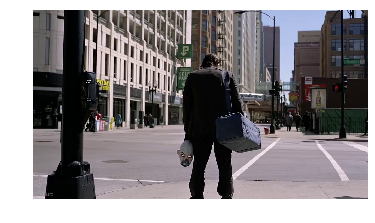

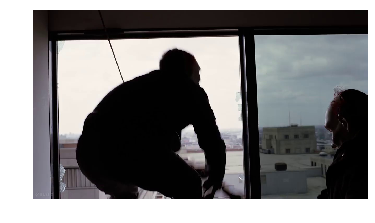

In [38]:

for img in x:
    plt.axis('off')
    plt.imshow(img)
    plt.show()

In [27]:
for i in shotlist_psd['Start Frame'][:2].values:
    Image(filename = f'{path_frames}frame{i}.jpg')

<BarContainer object of 210 artists>

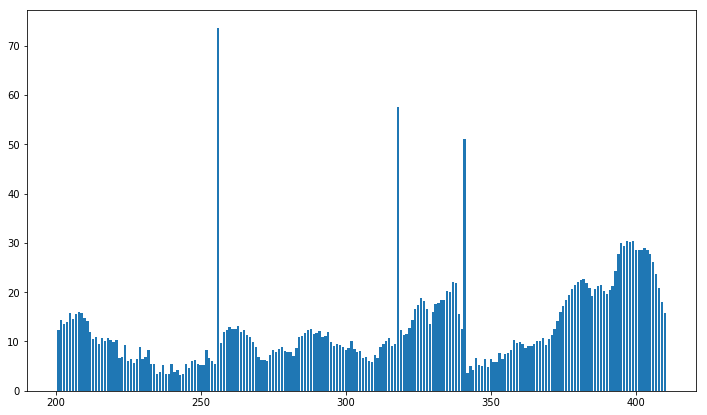

In [21]:
data2 = data.copy()
data2 = data2[200: 410]
plt.figure(figsize=(12, 7))
plt.bar(data2['Frame Number'], data2['content_val'])